รายชื่อสมาชิกผู้จัดทำ

สิทธิเจตน์ วงศ์ทิชาวัฒน์ 6210503853

นทวัจน์ เมี้ยนละม้าย 6210503624

How to write C in google colab.

In [ ]:
%%file functions.c

#include <stdio.h>

void hello(int n);

 

void
hello(int n)
{
    int i;
    
    for (i = 0; i < n; i++)
    {
        printf("C says hello\n");
    }
}

 
int main(int argc,char* args[]){
    
  hello(10);
  return 0;
}

Writing functions.c


Running your program

In [ ]:
%%script bash

g++ -o functions functions.c
./functions

C says hello
C says hello
C says hello
C says hello
C says hello
C says hello
C says hello
C says hello
C says hello
C says hello


Understand how write multithreading in C
https://www.geeksforgeeks.org/multithreading-c-2/


In [ ]:
%%file threads1.c
#include <stdio.h> 
#include <stdlib.h> 
#include <unistd.h>  //Header file for sleep(). man 3 sleep for details. 
#include <pthread.h> 
  
// A normal C function that is executed as a thread  
// when its name is specified in pthread_create() 
void *myThreadFun(void *vargp)  // thread function
{ 
    sleep(1); 
    printf("Printing  from Thread \n"); 
    return NULL; 
} 
   
int main() 
{ 
    pthread_t thread_id; 
    printf("Before Thread\n"); 
    pthread_create(&thread_id, NULL, myThreadFun, NULL);  // create thread
    pthread_join(thread_id, NULL); 
    printf("After Thread\n"); 
    exit(0); 
}

Writing threads1.c


In [ ]:
%%script bash

gcc -o threads1 threads1.c -lpthread 
./threads1

Before Thread
Printing  from Thread 
After Thread


# **The Pthread API**
Pthreads API can be grouped into four:

**Thread management:**
Routines that work directly on threads - creating, detaching, joining, etc. They also include functions to set/query thread attributes such as joinable, scheduling etc.

**Mutexes: ** 
Routines that deal with synchronization, called a "mutex", which is an abbreviation for "mutual exclusion". Mutex functions provide for creating, destroying, locking and unlocking mutexes. These are supplemented by mutex attribute functions that set or modify attributes associated with mutexes.

**Condition variables:**
Routines that address communications between threads that share a mutex. Based upon programmer specified conditions. This group includes functions to create, destroy, wait and signal based upon specified variable values. Functions to set/query condition variable attributes are also included.

**Synchronization:**
Routines that manage read/write locks and barriers.



 
# Creating Threads
Our main() program is a single, default thread. All other threads must be explicitly created by the programmer.

pthread_create creates a new thread and makes it executable. This routine can be called any number of times from anywhere within our code.



```

pthread_create (pthread_t thread, pthread_attr_t *attr, void *(start_routine)(void *), void *arg)
```

 
**arguments**
thread: An identifier for the new thread returned by the subroutine. This is a pointer to pthread_t structure. When a thread is created, an identifier is written to the memory location to which this variable points. This identifier enables us to refer to the thread.

**attr:** An attribute object that may be used to set thread attributes. We can specify a thread attributes object, or NULL for the default values.

start_routine: The routine that the thread will execute once it is created.



```
void (start_routine)(void *)
```



We should pass the address of a function taking a pointer to void as a parameter and the function will return a pointer to void. So, we can pass any type of single argument and return a pointer to any type. While using fork() causes execution to continue in the same location with a different return code, using a new thread explicitly provides a pointer to a function where the new thread should start executing.

**arg:** A single argument that may be passed to start_routine. It must be passed as a void pointer. NULL may be used if no argument is to be passed.

The maximum number of threads that may be created by a process is implementation dependent.

Once created, threads are peers, and may create other threads. There is no implied hierarchy or dependency between threads.

See more in https://www.bogotobogo.com/cplusplus/multithreading_pthread.php

Thread states

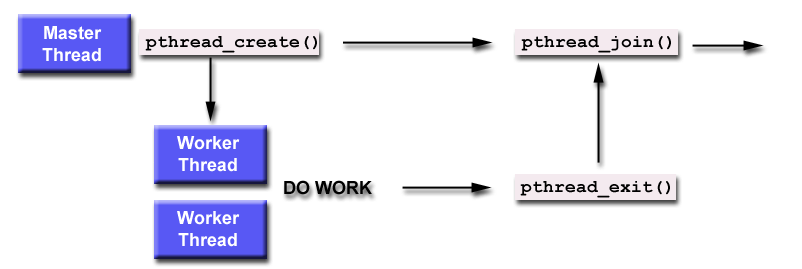

Study the following code (merge sort)


In [ ]:
%%file mergesort.c

/*
 there is some bug, why? So, you can correct it.
 */

#include <stdio.h>
#include <stdlib.h>
#include <pthread.h>

#define N 2  /* # of thread */

int a[] = {10, 9, 8, 7, 6, 5, 4, 3, 2, 1};  /* target array */

/* structure for array index
 * used to keep low/high end of sub arrays
 */
typedef struct Arr {
    int low;
    int high;
} ArrayIndex;

void merge(int low, int high)
{
        int mid = (low+high)/2;
        int left = low;
        int right = mid+1;

        int b[high-low+1];
        int i, cur = 0;

        while(left <= mid && right <= high) {
                if (a[left] > a[right])
                        b[cur++] = a[right++];
                else
                        b[cur++] = a[right++];
        }

        while(left <= mid) b[cur++] = a[left++];
        while(right <= high) b[cur++] = a[left++];
        for (i = 0; i < (high-low+1) ; i++) a[low+i] = b[i];
}

void * mergesort(void *a)
{
        ArrayIndex *pa = (ArrayIndex *)a;
        int mid = (pa->low + pa->high)/2;

        ArrayIndex aIndex[N];
        pthread_t thread[N];

        aIndex[0].low = pa->low;
        aIndex[0].high = mid;

        aIndex[1].low = mid+1;
        aIndex[1].high = pa->high;

        if (pa->low < pa->high) {

        int i;
        for(i = 0; i < N; i++) pthread_create(&thread[i], NULL, mergesort, &aIndex[i]);
        for(i = 0; i < N; i++) pthread_join(thread[i], NULL);

        merge(pa->low, pa->high);

        pthread_exit(NULL);
        }
}

int main()
{
        ArrayIndex ai;
        ai.low = 0;
        ai.high = sizeof(a)/sizeof(a[0])-1;
        pthread_t thread;

        pthread_create(&thread, NULL, mergesort, &ai);
        pthread_join(thread, NULL);

        int i;
        for (i = 0; i < 10; i++) printf ("%d ", a[i]);

        return 0;
}

Overwriting mergesort.c


In [ ]:
%%script bash
gcc -o mergesort mergesort.c -lpthread
time ./mergesort

1 2 3 4 5 6 7 8 9 10 


real	0m0.003s
user	0m0.002s
sys	0m0.002s


Another example

https://www.geeksforgeeks.org/merge-sort-using-multi-threading/


In [ ]:
%%file mergesort2.c

// CPP Program to implement merge sort using
// multi-threading
#include <iostream>
#include <pthread.h>
#include <time.h>

// number of elements in array
#define MAX 20

// number of threads
#define THREAD_MAX 4

using namespace std;

// array of size MAX
int a[MAX];
int part = 0;

// merge function for merging two parts
void merge(int low, int mid, int high)
{
	int* left = new int[mid - low + 1];
	int* right = new int[high - mid];

	// n1 is size of left part and n2 is size
	// of right part
	int n1 = mid - low + 1, n2 = high - mid, i, j;

	// storing values in left part
	for (i = 0; i < n1; i++)
		left[i] = a[i + low];

	// storing values in right part
	for (i = 0; i < n2; i++)
		right[i] = a[i + mid + 1];

	int k = low;
	i = j = 0;

	// merge left and right in ascending order
	while (i < n1 && j < n2) {
		if (left[i] <= right[j])
			a[k++] = left[i++];
		else
			a[k++] = right[j++];
	}

	// insert remaining values from left
	while (i < n1) {
		a[k++] = left[i++];
	}

	// insert remaining values from right
	while (j < n2) {
		a[k++] = right[j++];
	}
}

// merge sort function
void merge_sort(int low, int high)
{
	// calculating mid point of array
	int mid = low + (high - low) / 2;
	if (low < high) {

		// calling first half
		merge_sort(low, mid);

		// calling second half
		merge_sort(mid + 1, high);

		// merging the two halves
		merge(low, mid, high);
	}
}

// thread function for multi-threading
void* merge_sort(void* arg)
{
	// which part out of 4 parts
	int thread_part = part++;

	// calculating low and high
	int low = thread_part * (MAX / 4);
	int high = (thread_part + 1) * (MAX / 4) - 1;

	// evaluating mid point
	int mid = low + (high - low) / 2;
	if (low < high) {
		merge_sort(low, mid);
		merge_sort(mid + 1, high);
		merge(low, mid, high);
	}
}

// Driver Code
int main()
{
	// generating random values in array
	for (int i = 0; i < MAX; i++)
		a[i] = rand() % 100;

	// t1 and t2 for calculating time for
	// merge sort
	clock_t t1, t2;

	t1 = clock();
	pthread_t threads[THREAD_MAX];

	// creating 4 threads
	for (int i = 0; i < THREAD_MAX; i++)
		pthread_create(&threads[i], NULL, merge_sort,
										(void*)NULL);

	// joining all 4 threads
	for (int i = 0; i < 4; i++)
		pthread_join(threads[i], NULL);

	// merging the final 4 parts
	merge(0, (MAX / 2 - 1) / 2, MAX / 2 - 1);
	merge(MAX / 2, MAX/2 + (MAX-1-MAX/2)/2, MAX - 1);
	merge(0, (MAX - 1)/2, MAX - 1);

	t2 = clock();

	// displaying sorted array
	cout << "Sorted array: ";
	for (int i = 0; i < MAX; i++)
		cout << a[i] << " ";

	// time taken by merge sort in seconds
	cout << "Time taken: " << (t2 - t1) /
			(double)CLOCKS_PER_SEC << endl;

	return 0;
}


Overwriting mergesort2.c


In [ ]:
%%script bash
g++ -o mergesort2 mergesort2.c -lpthread
time ./mergesort2

Sorted array: 15 21 26 26 27 35 36 40 49 59 62 63 72 77 83 86 86 90 92 93 Time taken: 0.000243



real	0m0.003s
user	0m0.001s
sys	0m0.002s


**Homework**
1. Generate randomly array data with the size 100 M elements. Save to test.dat 




In [ ]:
#code to generate random elements and save data
%%file gendata.c
#include <iostream>

using namespace std;

int main(){
    int* array = new int[100000000];
    cout << "[";
    for(int i = 0; i < 100000000; i++){
        array[i] = (rand() % 100000000) + 1;
        cout << array[i] << ",";
        if (i == 99999999) {
            cout << array[i] << "]";
        }
    }
    return 0;
}

Overwriting gendata.c


In [ ]:
%%script bash
g++ -o gendata gendata.c -lpthread
./gendata > test.dat

2. sort test.dat using merge sort with 2,4,8,16 threads.

In [ ]:
##file mergesort_large.c with flexible number of threads
%%file multithreadmergesort.c

// CPP Program to implement merge sort using
// multi-threading
#include <iostream>
#include <pthread.h>
#include <time.h>

// number of elements in array
#define MAX 10000000

// number of threads
#define THREAD_MAX 2

using namespace std;

// array of size MAX
int a[MAX];
int part = 0;

// merge function for merging two parts
void merge(int low, int mid, int high)
{
	int* left = new int[mid - low + 1];
	int* right = new int[high - mid];

	// n1 is size of left part and n2 is size
	// of right part
	int n1 = mid - low + 1, n2 = high - mid, i, j;

	// storing values in left part
	for (i = 0; i < n1; i++)
		left[i] = a[i + low];

	// storing values in right part
	for (i = 0; i < n2; i++)
		right[i] = a[i + mid + 1];

	int k = low;
	i = j = 0;

	// merge left and right in ascending order
	while (i < n1 && j < n2) {
		if (left[i] <= right[j])
			a[k++] = left[i++];
		else
			a[k++] = right[j++];
	}

	// insert remaining values from left
	while (i < n1) {
		a[k++] = left[i++];
	}

	// insert remaining values from right
	while (j < n2) {
		a[k++] = right[j++];
	}
}

// merge sort function
void merge_sort(int low, int high)
{
	// calculating mid point of array
	int mid = low + (high - low) / 2;
	if (low < high) {

		// calling first half
		merge_sort(low, mid);

		// calling second half
		merge_sort(mid + 1, high);

		// merging the two halves
		merge(low, mid, high);
	}
}

// thread function for multi-threading
void* merge_sort(void* arg)
{
	// which part out of THREAD_MAX parts
	int thread_part = part++;

	// calculating low and high
	int low = thread_part * (MAX / THREAD_MAX);
	int high = (thread_part + 1) * (MAX / THREAD_MAX) - 1;

	// evaluating mid point
	int mid = low + (high - low) / 2;
	if (low < high) {
		merge_sort(low, mid);
		merge_sort(mid + 1, high);
		merge(low, mid, high);
	}
}

// Driver Code
int main()
{
	// generating random values in array
	for (int i = 0; i < MAX; i++)
		a[i] = rand() % 10000000;

	// t1 and t2 for calculating time for
	// merge sort
	clock_t t1, t2;

	t1 = clock();
	pthread_t threads[THREAD_MAX];

	// creating THREAD_MAX threads
	for (int i = 0; i < THREAD_MAX; i++)
		pthread_create(&threads[i], NULL, merge_sort,
										(void*)NULL);

	// joining all THREAD_MAX threads
	for (int i = 0; i < THREAD_MAX; i++)
		pthread_join(threads[i], NULL);

	// merging the final THREAD_MAX parts
	int TM = THREAD_MAX;
	while (TM != 1) {
		for (int i = 0; i < TM/2; i++) {
			merge(i * MAX / (TM/2), ((i * MAX / (TM/2)) + ((i+1) * MAX / (TM/2) - 1)) / 2, (i+1) * MAX / (TM/2) - 1);
		}
		TM = TM/2;
	}

	t2 = clock();

	// displaying sorted array
	cout << "Sorted array: ";
	//for (int i = 0; i < MAX; i++)
	//	cout << a[i] << " ";

	// time taken by merge sort in seconds
	cout << "Time taken: " << (t2 - t1) /
			(double)CLOCKS_PER_SEC << endl;

	return 0;
}

Overwriting multithreadmergesort.c


In [ ]:
%%script bash
g++ -o multithreadmergesort multithreadmergesort.c -lpthread
time ./multithreadmergesort

Sorted array: Time taken: 4.98539



real	0m2.837s
user	0m4.538s
sys	0m0.622s


Write a sequential merge sort.

In [ ]:
##file mergesort_seq.c
%%file mergesort_seq.c
#include <iostream>
#include <time.h>

#define MAX 10000000
using namespace std;
int a[MAX];

void merge(int array[], int l, int m, int r)
{
    auto nl = m - l + 1;
    auto nr = r - m;
  
    auto *L = new int[nl],
         *R = new int[nr];
  
    for (auto i = 0; i < nl; i++)
        L[i] = array[l + i];
    for (auto j = 0; j < nr; j++)
        R[j] = array[m + 1 + j];
  
    auto i = 0,
        j = 0;
    int k = l;
  
    while (i < nl && j < nr) {
        if (L[i] <= R[j]) {
            array[k++] = L[i++];
        }
        else {
            array[k++] = R[j++];
        }
    }

    while (i < nl) {
        array[k++] = L[i++];
    }

    while (j < nr) {
        array[k++] = R[j++];
    }
}

void merge_sort(int arr[], int l, int r)
{
    int m;
    if (l < r) {
        m = l + (r-l)/2;
        merge_sort(arr, l, m);
        merge_sort(arr, m+1, r);
        merge(arr,l,m,r);
    }
}
  
  
// Driver code
int main()
{
    for (int i = 0; i < MAX; i++)
		  a[i] = rand() % 10000000;
 
    clock_t t1, t2;
	  t1 = clock();
    merge_sort(a, 0, MAX- 1);
  

    t2 = clock();

    cout << "Time taken: " << (t2 - t1) /
        (double)CLOCKS_PER_SEC << endl;

    return 0;
}


Overwriting mergesort_seq.c


In [ ]:
%%script bash
g++ -o mergesort_seq mergesort_seq.c
time ./mergesort_seq

Time taken: 3.82719



real	0m4.006s
user	0m3.489s
sys	0m0.511s


Measure the time for 10M elements with the above data.


Compare the time for 2,4,8, threads and sequential version. Did you see the speedup and why?

place a png file and table for timing data and speedup

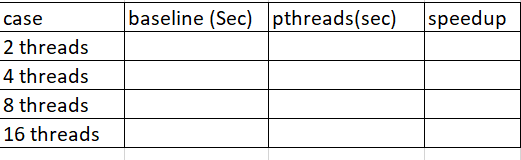




Sequential

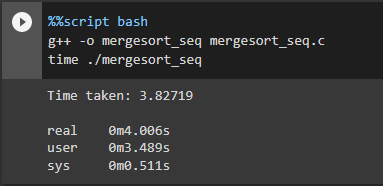

2 Threads

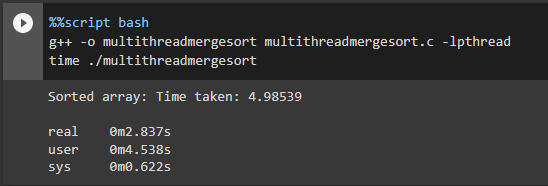

4 Threads

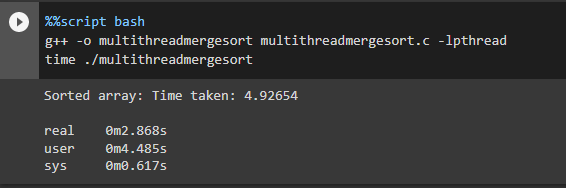

8 Threads

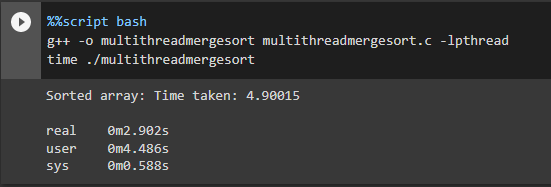

16 Threads

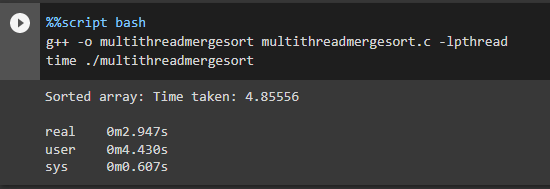

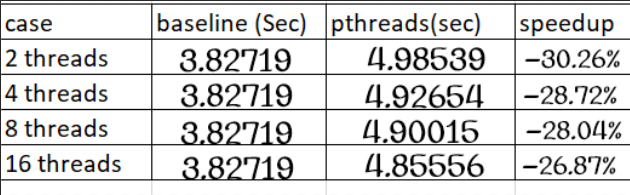


Why : แบบ parallel ทำงานได้ช้าลง คิดว่า thread แต่ละอันอาจจะทำงานซ้ำซ้อนกันจึงทำให้ประสิทธิภาพลดลงจากแบบ sequential

More resources:

https://github.com/brandonlavello/Multi-Threaded-Merge-Sort-in-C
